### Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('data/Musquash_MPA_Benthos_Infauna.csv', encoding='latin1')
df2 = pd.read_csv('data/Musquash_MPA_Sediment_Grain_Size.csv', encoding='latin1')
df3 = pd.read_csv('data/Musquash_MPA_Sediment_Loss_Ignition.csv', encoding='latin1')
df4 = pd.read_csv('data/Musquash_MPA_Set_Data.csv', encoding='latin1')

In [3]:
# Find common columns
common_cols = set(df1.columns) & set(df2.columns) & set(df3.columns) & set(df4.columns)
print("Common columns across datasets:", common_cols)
print(f"df1 shape: {df1.shape}")
print(f"df2 shape: {df2.shape}")
print(f"df3 shape: {df3.shape}")
print(f"df4 shape: {df4.shape}")

Common columns across datasets: {'station', 'month_mois', 'lon', 'year_année', 'lat', 'day_jour', 'set_id'}
df1 shape: (7901, 13)
df2 shape: (318, 22)
df3 shape: (1481, 18)
df4 shape: (440, 16)


In [37]:
common_cols = ['station', 'year_année', 'set_id', 'lat', 'lon', 'month_mois', 'day_jour']

for col in common_cols:
    print(f"Column: {col}")
    print(f"  df1: {df1[col].nunique()} unique values")
    print(f"  df2: {df2[col].nunique()} unique values")
    print(f"  df3: {df3[col].nunique()} unique values")
    print(f"  df4: {df4[col].nunique()} unique values")
    print("="*40)

Column: station
  df1: 30 unique values
  df2: 30 unique values
  df3: 30 unique values
  df4: 31 unique values
Column: year_année
  df1: 8 unique values
  df2: 7 unique values
  df3: 7 unique values
  df4: 8 unique values
Column: set_id
  df1: 431 unique values
  df2: 317 unique values
  df3: 378 unique values
  df4: 438 unique values
Column: lat
  df1: 406 unique values
  df2: 308 unique values
  df3: 364 unique values
  df4: 420 unique values
Column: lon
  df1: 407 unique values
  df2: 305 unique values
  df3: 363 unique values
  df4: 417 unique values
Column: month_mois
  df1: 6 unique values
  df2: 6 unique values
  df3: 6 unique values
  df4: 6 unique values
Column: day_jour
  df1: 12 unique values
  df2: 9 unique values
  df3: 11 unique values
  df4: 13 unique values


In [5]:
# missing value
df4.isnull().sum()

set_id                     0
day_jour                   0
month_mois                 0
year_année                 0
station                    0
lat                        0
lon                        0
depth_m_profondeur_m      61
time_heure                90
strata_strate              0
season_saison              0
wt_a_g                     3
wt_b_g                     4
wt_c_g                     5
tot_wt_g                   2
comments_commentaires    427
dtype: int64

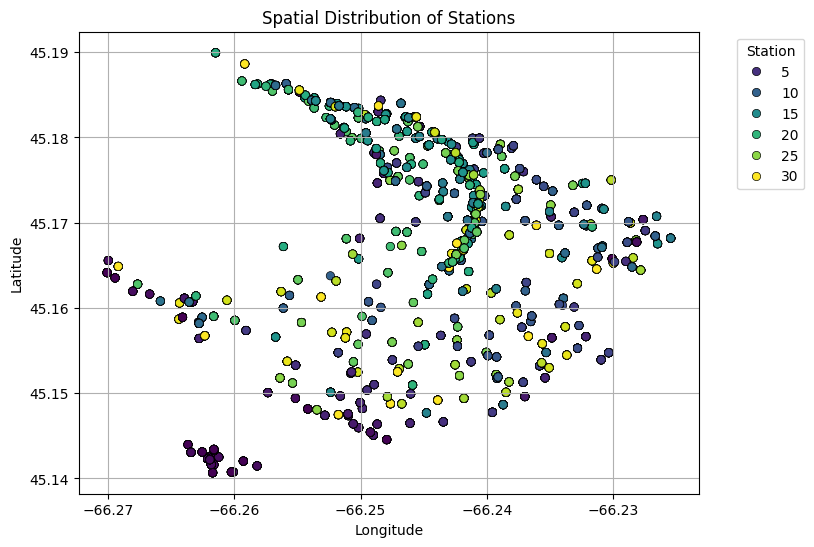

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df1["lon"], y=df1["lat"], hue=df1["station"], palette="viridis", edgecolor="black")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Stations")
plt.legend(title="Station", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


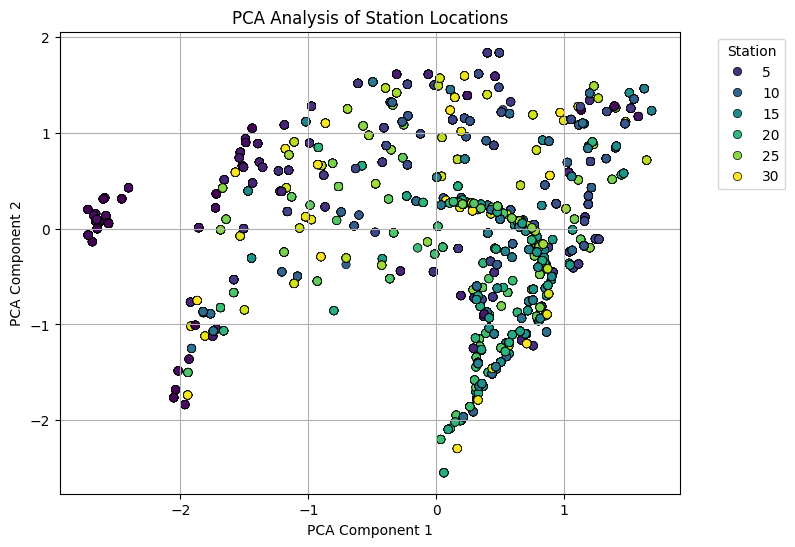

In [7]:
# this is PCA and it makes no sense
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1[['lon', 'lat']])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df1["PCA1"] = pca_result[:, 0]
df1["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df1["PCA1"], y=df1["PCA2"], hue=df1["station"], palette="viridis", edgecolor="black")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Analysis of Station Locations")
plt.legend(title="Station", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


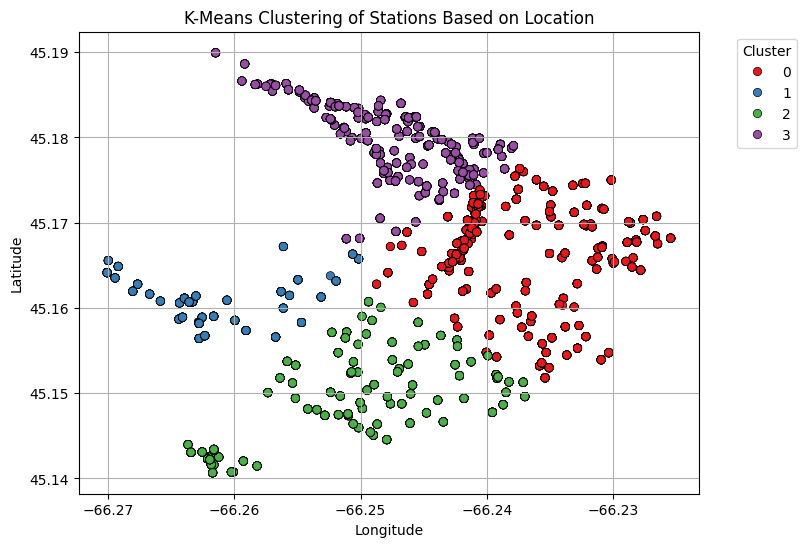

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df1["Cluster_drop"] = kmeans.fit_predict(df1[['lon', 'lat']])

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df1["lon"], y=df1["lat"], hue=df1["Cluster_drop"], palette="Set1", edgecolor="black")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-Means Clustering of Stations Based on Location")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


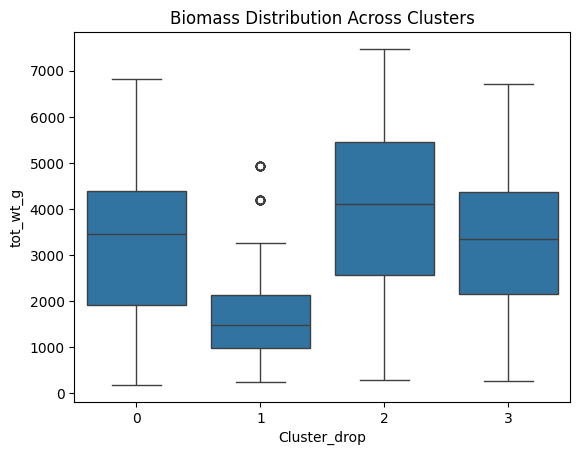

In [9]:
sns.boxplot(x="Cluster_drop", y="tot_wt_g", data=df1)
plt.title("Biomass Distribution Across Clusters")
plt.show()

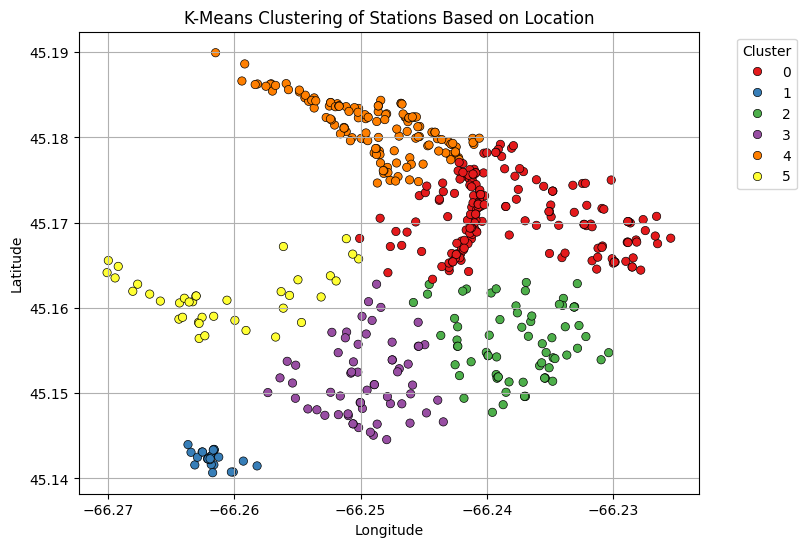

In [10]:
import pandas as pd
from sklearn.cluster import KMeans

lat_lon_data = pd.concat([
    df1[["lat", "lon"]],
    df2[["lat", "lon"]],
    df3[["lat", "lon"]],
    df4[["lat", "lon"]]
]).drop_duplicates().reset_index(drop=True)

n_clusters = 6  # decided using elbow and silhoutte method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
lat_lon_data["Cluster"] = kmeans.fit_predict(lat_lon_data[["lat", "lon"]])

lat_lon_cluster_map = lat_lon_data.copy()
lat_lon_cluster_map.to_csv("lat_lon_cluster_map.csv", index=False) 

plt.figure(figsize=(8, 6))
sns.scatterplot(x=lat_lon_data["lon"], y=lat_lon_data["lat"], hue=lat_lon_data["Cluster"], palette="Set1", edgecolor="black")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("K-Means Clustering of Stations Based on Location")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

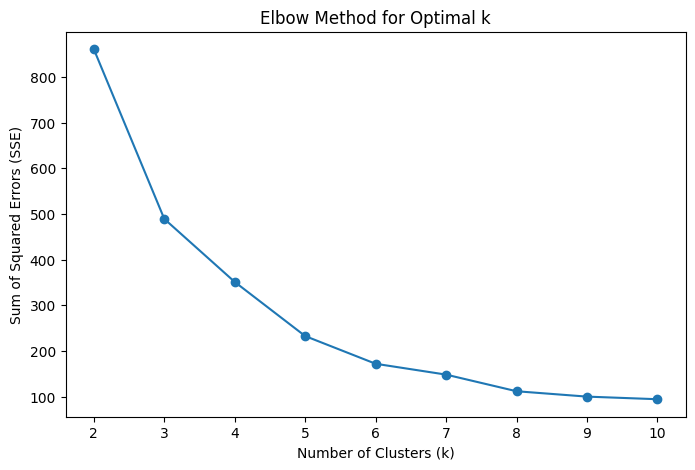

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
lat_lon_scaled = scaler.fit_transform(lat_lon_data)

# SSE
sse = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(lat_lon_scaled)
    sse.append(kmeans.inertia_) 

# elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()


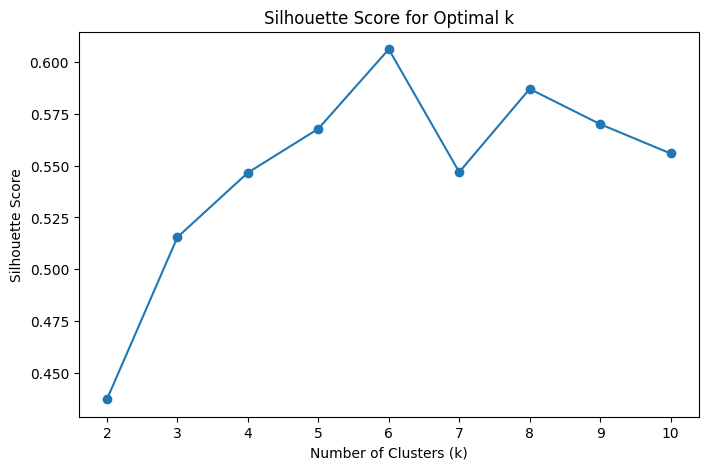

In [12]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(lat_lon_scaled)
    silhouette_scores.append(silhouette_score(lat_lon_scaled, cluster_labels))
    
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.show()

In [13]:
lat_lon_cluster_map = pd.read_csv("lat_lon_cluster_map.csv")

lat_lon_cluster_map = lat_lon_cluster_map[["lat", "lon", "Cluster"]]

df1 = df1.merge(lat_lon_cluster_map, on=["lat", "lon"], how="left")
df2 = df2.merge(lat_lon_cluster_map, on=["lat", "lon"], how="left")
df3 = df3.merge(lat_lon_cluster_map, on=["lat", "lon"], how="left")
df4 = df4.merge(lat_lon_cluster_map, on=["lat", "lon"], how="left")

print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)

Index(['set_id', 'lat', 'lon', 'station', 'strata_strate', 'day_jour',
       'month_mois', 'year_année', 'season_saison',
       'scientificName_Nom_scientifique',
       'scientificNameID_Identifiant_du_nom_scientifique', 'total_count',
       'tot_wt_g', 'PCA1', 'PCA2', 'Cluster_drop', 'Cluster'],
      dtype='object')
Index(['set_id', 'lat', 'lon', 'day_jour', 'month_mois', 'year_année',
       'station', 'replicate_réplicat', 'cont_wt_g', 'gross_wet_wt_g',
       'gross_dry_wt_g', 'net_dry_wt_g', 'sieve_wt_250um_g',
       'sieve_wt_125um_g', 'sieve_wt_64um_g', 'gross_wt_250um_g',
       'gross_wt_125um_g', 'gross_wt_64um_g', 'net_dry_250um_g',
       'net_dry_125um_g', 'net_dry_64um_g', 'silt_frac_g', 'Cluster'],
      dtype='object')
Index(['set_id', 'lat', 'lon', 'day_jour', 'month_mois', 'year_année',
       'station', 'replicate_réplicat', 'cont_g', 'air_cont_g', 'oven_cont_g',
       'net_dry_wt_g', 'ash_1_g', 'ash_2_g', 'perc_loss_ash_1__',
       'perc_loss_ash_2__', 'tot_

## Preprocessing

1. Target features -> biomass -> total_count, tot_wt_g

Column: total_count
  Missing values: 0 out of 7901
  Mean: 57.92
  Standard deviation: 355.75
  Min: 0.0
  Max: 14880.0
  Cardinality: 457
Column: tot_wt_g
  Missing values: 0 out of 7901
  Mean: 3369.29
  Standard deviation: 1647.25
  Min: 186.0
  Max: 7474.0
  Cardinality: 414


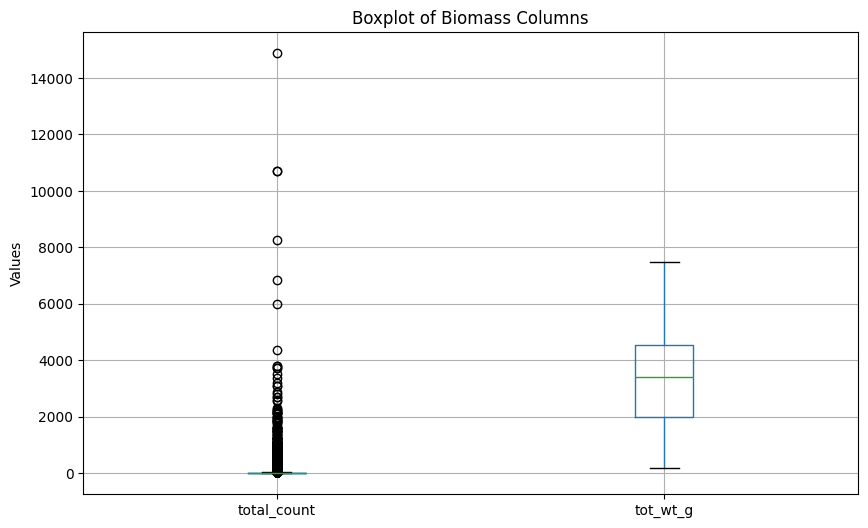

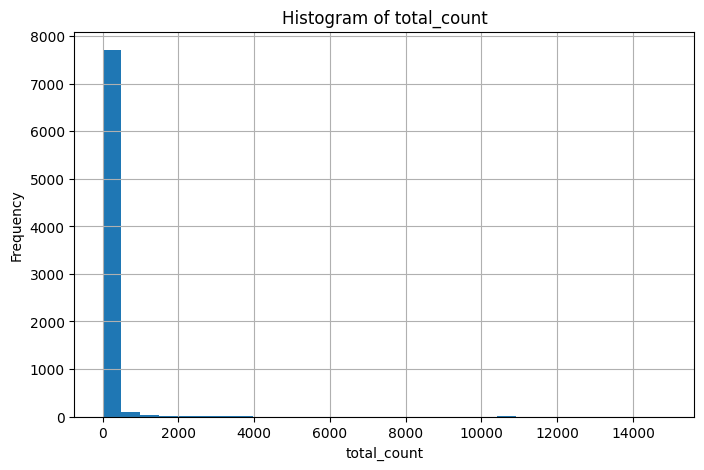

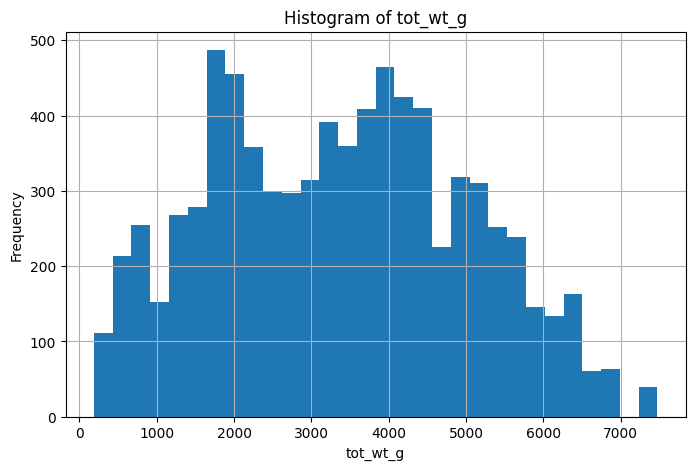

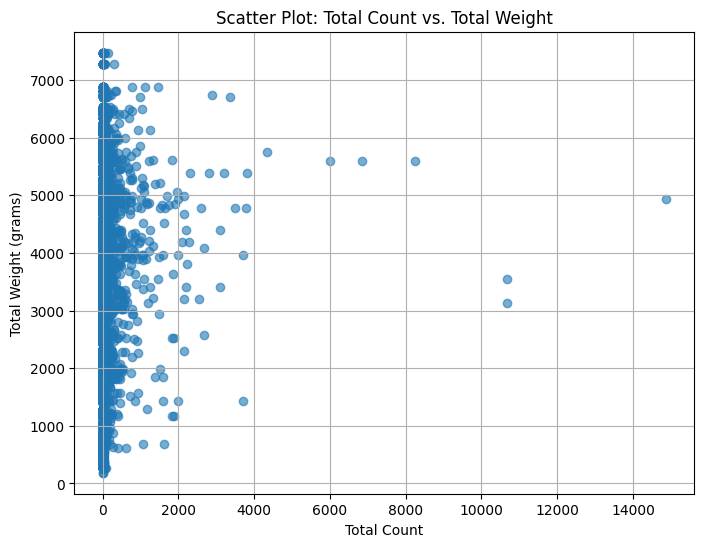

In [14]:
biomass_cols = ['total_count', 'tot_wt_g']

# Exploratory Data Analysis
for col in biomass_cols:
    print(f"Column: {col}")
    
    # Basic statistics
    print(f"  Missing values: {df1[col].isna().sum()} out of {len(df1)}")
    print(f"  Mean: {df1[col].mean():.2f}")
    print(f"  Standard deviation: {df1[col].std():.2f}")
    print(f"  Min: {df1[col].min()}")
    print(f"  Max: {df1[col].max()}")
    print(f"  Cardinality: {df1[col].nunique()}")
    print("="*40)

# Boxplot for visualization
plt.figure(figsize=(10, 6))
df1[biomass_cols].boxplot()
plt.title('Boxplot of Biomass Columns')
plt.ylabel('Values')
plt.show()

# Histograms for distribution
for col in biomass_cols:
    plt.figure(figsize=(8, 5))
    df1[col].hist(bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Scatter plot to check relationships between the two columns
plt.figure(figsize=(8, 6))
plt.scatter(df1['total_count'], df1['tot_wt_g'], alpha=0.6)
plt.title('Scatter Plot: Total Count vs. Total Weight')
plt.xlabel('Total Count')
plt.ylabel('Total Weight (grams)')
plt.grid(True)
plt.show()

In [15]:
import pandas as pd

def analyze_high_biomass(df1):

    high_biomass_df = df1[df1["total_count"] > 2000]
    selected_columns = ["set_id", "lat", "lon", "station", "strata_strate", "total_count", "tot_wt_g", "scientificName_Nom_scientifique", "year_année"]
    existing_columns = [col for col in selected_columns if col in high_biomass_df.columns]
    high_biomass_df_selected = high_biomass_df[existing_columns]

    print("High Biomass Locations Data Sample:")
    print(high_biomass_df_selected.head(10))
    
    return high_biomass_df_selected

high_biomass_df_selected = analyze_high_biomass(df1)

High Biomass Locations Data Sample:
           set_id        lat        lon  station strata_strate  total_count  \
310   2010.02.015  45.150100 -66.252367       15      subtidal       2876.0   
467   2010.02.022  45.162783 -66.267633       22    intertidal      14880.0   
468   2010.02.022  45.162783 -66.267633       22    intertidal       2001.0   
520   2010.02.025  45.179183 -66.238933       25    intertidal       3794.0   
521   2010.02.025  45.179183 -66.238933       25    intertidal       3504.0   
522   2010.02.025  45.179183 -66.238933       25    intertidal       2606.0   
565   2010.02.027  45.175000 -66.230167       27    intertidal       8252.0   
566   2010.02.027  45.175000 -66.230167       27    intertidal       6836.0   
567   2010.02.027  45.175000 -66.230167       27    intertidal       6004.0   
2918  2014.11.007  45.178733 -66.238050        7    intertidal       2144.0   

      tot_wt_g scientificName_Nom_scientifique  year_année  
310     6733.0            Cossura

station
11    4
20    4
25    3
27    3
9     3
10    3
22    2
19    2
1     2
8     2
4     2
15    1
7     1
6     1
Name: count, dtype: int64
strata_strate
intertidal    28
subtidal       3
channel        2
Name: count, dtype: int64


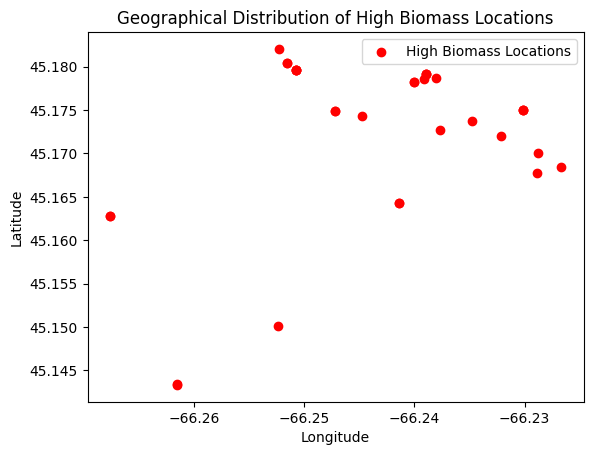

In [16]:
print(high_biomass_df_selected["station"].value_counts())
print(high_biomass_df_selected["strata_strate"].value_counts())

plt.scatter(high_biomass_df_selected["lon"], high_biomass_df_selected["lat"], c="red", label="High Biomass Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of High Biomass Locations")
plt.legend()
plt.show()

In [17]:
print(high_biomass_df_selected["scientificName_Nom_scientifique"].value_counts())

scientificName_Nom_scientifique
Nereis                   12
Nematoda                 10
Manayunkia aestuarina     4
Streblospio benedicti     3
Cossura longocirrata      2
Harpacticoida             2
Name: count, dtype: int64


In [18]:
print(high_biomass_df_selected["year_année"].value_counts().sort_index())

year_année
2010     9
2014     3
2015     3
2016    10
2017     8
Name: count, dtype: int64


In [19]:
!pip install folium



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import folium
from folium.plugins import MarkerCluster

map_center = [high_biomass_df_selected["lat"].mean(), high_biomass_df_selected["lon"].mean()]
biomass_map = folium.Map(location=map_center, zoom_start=12)

marker_cluster = MarkerCluster().add_to(biomass_map)

for _, row in high_biomass_df_selected.iterrows():
    popup_info = f"Station: {row['station']}<br>Total Count: {row['total_count']}<br>Strata: {row['strata_strate']}"
    folium.Marker(
        location=[row["lat"], row["lon"]],
        popup=popup_info,
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(marker_cluster)

biomass_map.save("high_biomass_map.html")
print("Map saved as 'high_biomass_map.html'. Open this file in a browser to view.")


Map saved as 'high_biomass_map.html'. Open this file in a browser to view.


In [21]:
import numpy as np
df1["log_total_count"] = np.log1p(high_biomass_df_selected["total_count"])

In [22]:
df1

,set_id,lat,lon,station,strata_strate,day_jour,month_mois,year_année,season_saison,scientificName_Nom_scientifique,scientificNameID_Identifiant_du_nom_scientifique,total_count,tot_wt_g,PCA1,PCA2,Cluster_drop,Cluster,log_total_count
0,2010.02.001,45.186283,-66.257067,1,channel,18,2,2010,Winter,Manayunkia aestuarina,urn:lsid:marinespecies.org:taxname:130926,4.0,6407.0,0.195274,-2.000854,3,4,NaN
1,2010.02.001,45.186283,-66.257067,1,channel,18,2,2010,Winter,Alitta virens,urn:lsid:marinespecies.org:taxname:234851,1.0,6407.0,0.195274,-2.000854,3,4,NaN
2,2010.02.001,45.186283,-66.257067,1,channel,18,2,2010,Winter,Nephtys ciliata,urn:lsid:marinespecies.org:taxname:130356,1.0,6407.0,0.195274,-2.000854,3,4,NaN
3,2010.02.001,45.186283,-66.257067,1,channel,18,2,2010,Winter,Micronephthys cornuta,urn:lsid:marinespecies.org:taxname:869884,4.0,6407.0,0.195274,-2.000854,3,4,NaN
4,2010.02.001,45.186283,-66.257067,1,channel,18,2,2010,Winter,Nephtys incisa,urn:lsid:marinespecies.org:taxname:130362,1.0,6407.0,0.195274,-2.000854,3,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7896,2021.09.030,45.183700,-66.248580,30,channel,23,9,2021,Autumn,Phoronis,urn:lsid:marinespecies.org:taxname:128545,40.0,3626.0,0.707090,-1.199242,3,4,NaN
7897,2021.09.030,45.183700,-66.248580,30,channel,23,9,2021,Autumn,Scoletoma laurentiana,urn:lsid:marinespecies.org:taxname:1491000,40.0,3626.0,0.707090,-1.199242,3,4,NaN
7898,2021.09.030,45.183700,-66.248580,30,channel,23,9,2021,Autumn,Micronephthys cornuta,urn:lsid:marinespecies.org:taxname:869884,4.0,3626.0,0.707090,-1.199242,3,4,NaN
7899,2021.09.030,45.183700,-66.248580,30,channel,23,9,2021,Autumn,Streblospio benedicti,urn:lsid:marinespecies.org:taxname:131191,68.0,3626.0,0.707090,-1.199242,3,4,NaN


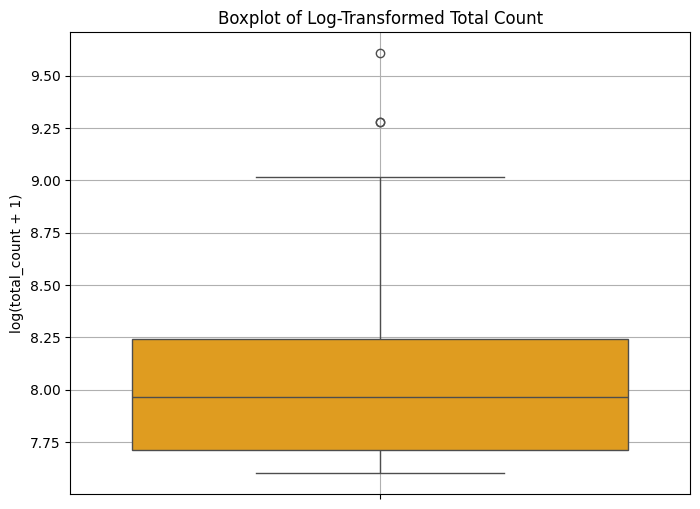

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df1["log_total_count"], color="orange")
plt.title("Boxplot of Log-Transformed Total Count")
plt.ylabel("log(total_count + 1)")
plt.grid(True)
plt.show()

Lower Bound: 6.924534149757722, Upper Bound: 9.031583013872936


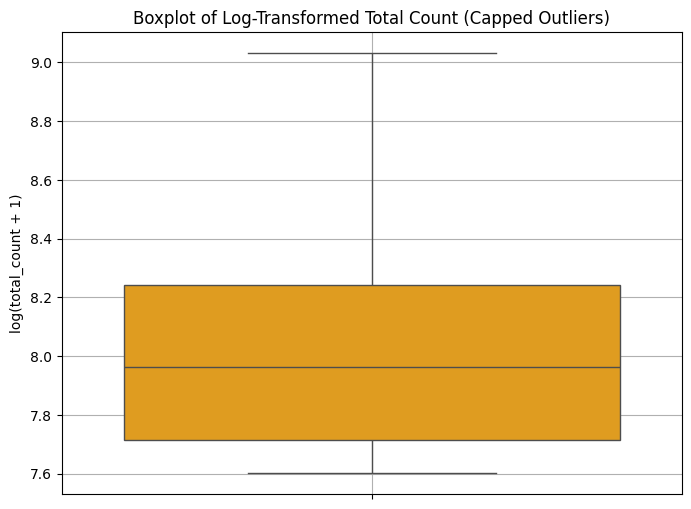

In [24]:
import numpy as np

Q1 = df1["log_total_count"].quantile(0.25)
Q3 = df1["log_total_count"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

df1["log_total_count_capped"] = np.clip(df1["log_total_count"], lower_bound, upper_bound)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df1["log_total_count_capped"], color="orange")
plt.title("Boxplot of Log-Transformed Total Count (Capped Outliers)")
plt.ylabel("log(total_count + 1)")
plt.grid(True)
plt.show()

df2 - sediment

In [25]:
# Merge df1 (biomass) and df2 (sediment composition) on common columns like 'set_id', 'station'
merged_df = pd.merge(df1, df2, on=["lat", "lon"], how="inner")

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5877 entries, 0 to 5876
Data columns (total 40 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   set_id_x                                          5877 non-null   object 
 1   lat                                               5877 non-null   float64
 2   lon                                               5877 non-null   float64
 3   station_x                                         5877 non-null   int64  
 4   strata_strate                                     5877 non-null   object 
 5   day_jour_x                                        5877 non-null   int64  
 6   month_mois_x                                      5877 non-null   int64  
 7   year_année_x                                      5877 non-null   int64  
 8   season_saison                                     5877 non-null   object 
 9   scientificName_Nom_

In [27]:
# Aggregate total biomass per sediment sample
aggregated_df = merged_df.groupby(["set_id_x", "lat", "lon", "station_x"]).agg({
    # "total_count": "sum",
    "tot_wt_g": "sum",
    "net_dry_250um_g": "first",
    "net_dry_125um_g": "first",
    "net_dry_64um_g": "first",
    "silt_frac_g": "first"
}).reset_index()

# Check the aggregated data
print(aggregated_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   set_id_x         310 non-null    object 
 1   lat              310 non-null    float64
 2   lon              310 non-null    float64
 3   station_x        310 non-null    int64  
 4   tot_wt_g         310 non-null    float64
 5   net_dry_250um_g  303 non-null    float64
 6   net_dry_125um_g  303 non-null    float64
 7   net_dry_64um_g   303 non-null    float64
 8   silt_frac_g      303 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 21.9+ KB
None


In [28]:
# Check for missing (NaN) values in the dataset
print(aggregated_df.isnull().sum())

set_id_x           0
lat                0
lon                0
station_x          0
tot_wt_g           0
net_dry_250um_g    7
net_dry_125um_g    7
net_dry_64um_g     7
silt_frac_g        7
dtype: int64


In [29]:
# Fill NaN values with the median only for numeric columns
aggregated_df = aggregated_df.fillna(aggregated_df.select_dtypes(include=[np.number]).median())

In [30]:
import statsmodels.api as sm

# Define features (sediment composition) and target (total biomass)
X = aggregated_df[["net_dry_250um_g", "net_dry_125um_g", "net_dry_64um_g", "silt_frac_g"]]
y = aggregated_df["tot_wt_g"]

# Add a constant term for intercept
X = sm.add_constant(X)

# Fit linear regression model
linear_model = sm.OLS(y, X).fit()

# Display regression results
print(linear_model.summary())


                            OLS Regression Results                            
Dep. Variable:               tot_wt_g   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     13.60
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           3.24e-10
Time:                        12:46:09   Log-Likelihood:                -3733.4
No. Observations:                 310   AIC:                             7477.
Df Residuals:                     305   BIC:                             7496.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             3.19e+04   5931.248     

In [31]:
aggregated_df["log_tot_wt_g"] = np.log1p(aggregated_df["tot_wt_g"])

In [32]:
import statsmodels.formula.api as smf

glm_model = smf.glm(
    formula="log_tot_wt_g ~ net_dry_125um_g + net_dry_64um_g + silt_frac_g",
    data=aggregated_df,
    family=sm.families.Gamma(link=sm.families.links.log())
).fit()

print(glm_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           log_tot_wt_g   No. Observations:                  310
Model:                            GLM   Df Residuals:                      306
Model Family:                   Gamma   Df Model:                            3
Link Function:                    log   Scale:                       0.0084375
Method:                          IRLS   Log-Likelihood:                -443.50
Date:                Sun, 09 Feb 2025   Deviance:                       2.8213
Time:                        12:46:09   Pearson chi2:                     2.58
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2486
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.3131      0.012    1

c:\Users\CPK\.conda\envs\ml\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


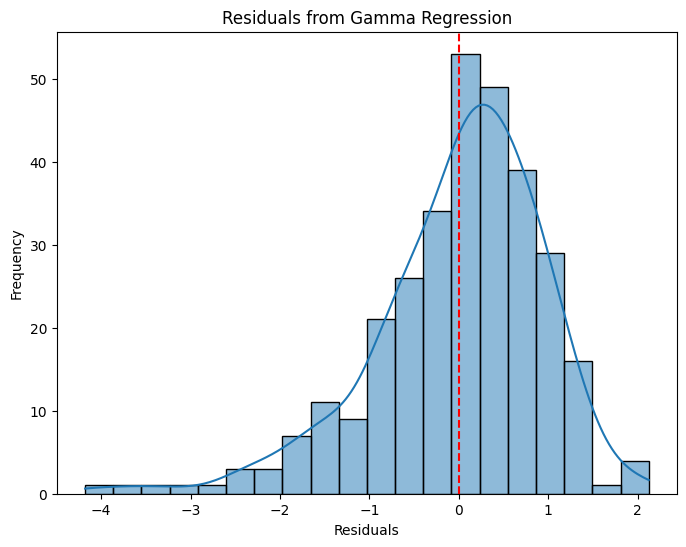

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

aggregated_df["residuals"] = glm_model.resid_response

plt.figure(figsize=(8, 6))
sns.histplot(aggregated_df["residuals"], kde=True, bins=20)
plt.axvline(0, color='red', linestyle='--')
plt.title("Residuals from Gamma Regression")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [34]:
glm_interaction = smf.glm(
    formula="log_tot_wt_g ~ net_dry_125um_g * silt_frac_g + net_dry_64um_g",
    data=aggregated_df,
    family=sm.families.Gamma(link=sm.families.links.log())
).fit()

print(glm_interaction.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           log_tot_wt_g   No. Observations:                  310
Model:                            GLM   Df Residuals:                      305
Model Family:                   Gamma   Df Model:                            4
Link Function:                    log   Scale:                       0.0082695
Method:                          IRLS   Log-Likelihood:                -439.55
Date:                Sun, 09 Feb 2025   Deviance:                       2.7515
Time:                        12:46:09   Pearson chi2:                     2.52
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2731
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

c:\Users\CPK\.conda\envs\ml\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


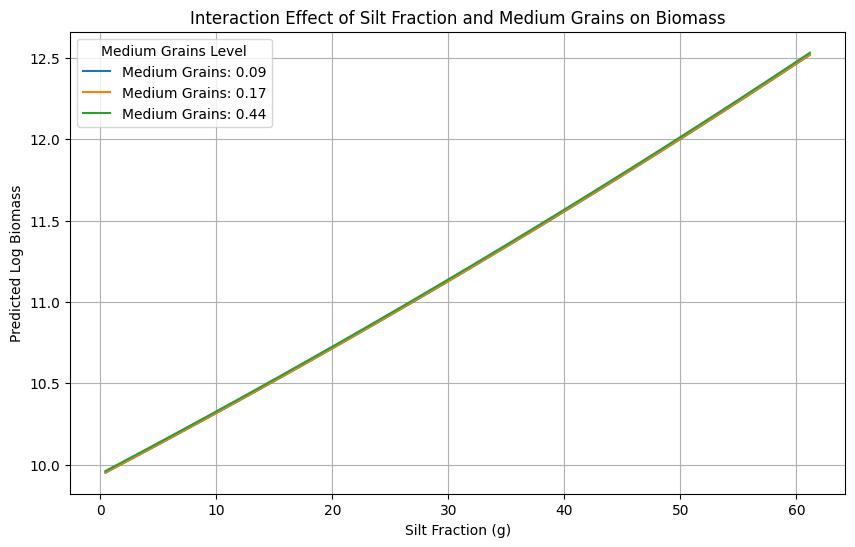

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Create a range of silt values for prediction
silt_range = np.linspace(aggregated_df["silt_frac_g"].min(), aggregated_df["silt_frac_g"].max(), 100)

# Define different levels of medium grains (net_dry_125um_g) - low, median, high
medium_grain_levels = [aggregated_df["net_dry_125um_g"].quantile(q) for q in [0.25, 0.5, 0.75]]  # 25%, 50%, 75%

# Initialize plot
plt.figure(figsize=(10, 6))

# Loop through medium grain levels and predict biomass across silt range
for level in medium_grain_levels:
    # Create a new DataFrame for predictions
    pred_df = pd.DataFrame({
        "silt_frac_g": silt_range,
        "net_dry_125um_g": level,
        "net_dry_64um_g": aggregated_df["net_dry_64um_g"].median()  # Keep fine grains constant
    })

    # Predict biomass using the GLM model
    predicted_biomass = glm_model.predict(pred_df)

    # Plot the results
    plt.plot(silt_range, predicted_biomass, label=f"Medium Grains: {level:.2f}")

# Customize plot
plt.xlabel("Silt Fraction (g)")
plt.ylabel("Predicted Log Biomass")
plt.title("Interaction Effect of Silt Fraction and Medium Grains on Biomass")
plt.legend(title="Medium Grains Level")
plt.grid(True)
plt.show()
